In [1]:
import requests
import urllib.parse

In [201]:
city = "aarey colony,Mumbai"
address=urllib.parse.quote(city)
country = "India"

In [202]:
url = "https://nominatim.openstreetmap.org/?addressdetails=1&q=" + address + "+" + country +"&format=json&limit=1"

In [203]:
response = requests.get(url).json()
lat=response[0]["lat"]
lon=response[0]["lon"]
ln=600
bd=300
ratio=f"{bd}x{ln}"
zoom="15"
access_token="pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q"
print(lat)
print(lon)

19.1503904
72.87426783008218


In [204]:
def maptype(map):
    api=f"https://api.mapbox.com/styles/v1/mapbox/{map}/static/{lon},{lat},{zoom}/{ratio}?access_token={access_token}"
    return api[0:]



#response = requests.get(maptype("satellite-v9"))
#print(response.url)

In [205]:
sample = requests.get(maptype("satellite-v9"))
print(f"Sample Status {sample.status_code}")
dark = requests.get(maptype("dark-v10"))
print(f"Dark Status {dark.status_code}")
light = requests.get(maptype("light-v10"))
print(f"Light Status {light.status_code}")
street = requests.get(maptype("streets-v11"))
print(f"Street Status {street.status_code}")
satellite = requests.get(maptype("satellite-v9"))
print(f"Satellite Status {satellite.status_code}")
street_old = requests.get(maptype("streets-v9"))
print(f"Street Status {street_old.status_code}")
satellite_new = requests.get(maptype("satellite-streets-v9"))
print(f"Satellite_new Status {satellite_new.status_code}")

Sample Status 200
Dark Status 200
Light Status 200
Street Status 200
Satellite Status 200
Street Status 200
Satellite_new Status 200


In [206]:
def file_name(name,file_t):
    file_t = f"/home/karan/Remote-vegetation-sensing/project/data/{file_t}.tiff"
    file = open(file_t[0:], "wb")
    file.write(name.content)
    file.close()


     
file_name(sample,"sample")
file_name(dark,"dark")
file_name(light,"light")
file_name(street,"street")
file_name(street_old,"street_old")
file_name(satellite,"satellite")
file_name(satellite_new,"satellite_new")





In [207]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

#from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go
from PIL import Image


In [208]:
%pwd
%ls

Dockerfile  README.md            docker-compose.yml  project/
LICENSE     Remote-python.ipynb  file.csv            requirements.txt


In [209]:
print('Check files ?:')
for name in glob('/home/karan/Remote-vegetation-sensing/project/data/*.tiff'):
    print(name)

Check files ?:
/home/karan/Remote-vegetation-sensing/project/data/dark.tiff
/home/karan/Remote-vegetation-sensing/project/data/satellite_new.tiff
/home/karan/Remote-vegetation-sensing/project/data/street_old.tiff
/home/karan/Remote-vegetation-sensing/project/data/street.tiff
/home/karan/Remote-vegetation-sensing/project/data/satellite.tiff
/home/karan/Remote-vegetation-sensing/project/data/sample.tiff
/home/karan/Remote-vegetation-sensing/project/data/light.tiff


In [210]:
S_sentinel_bands = glob(r"/home/karan/Remote-vegetation-sensing/project/data/*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands


['/home/karan/Remote-vegetation-sensing/project/data/dark.tiff',
 '/home/karan/Remote-vegetation-sensing/project/data/light.tiff',
 '/home/karan/Remote-vegetation-sensing/project/data/sample.tiff',
 '/home/karan/Remote-vegetation-sensing/project/data/satellite.tiff',
 '/home/karan/Remote-vegetation-sensing/project/data/satellite_new.tiff',
 '/home/karan/Remote-vegetation-sensing/project/data/street.tiff',
 '/home/karan/Remote-vegetation-sensing/project/data/street_old.tiff']

In [211]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

/home/karan/.local/lib/python3.8/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [212]:
arr_st = np.stack(l)

In [213]:
print(f'Height: {arr_st.shape[1]}\nWidth: {arr_st.shape[2]}\nBands: {arr_st.shape[0]}')

Height: 600
Width: 300
Bands: 7


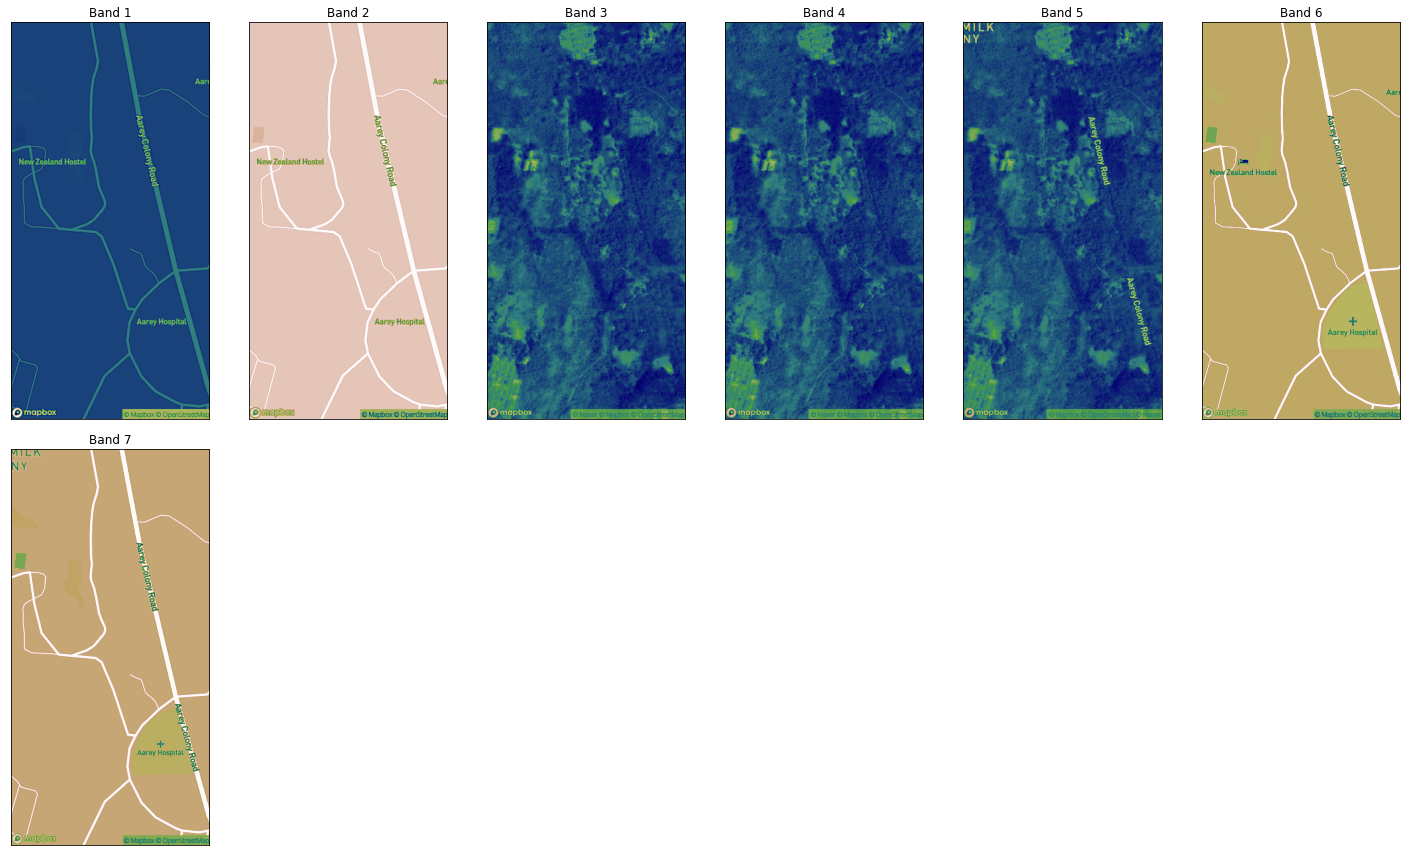

In [214]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

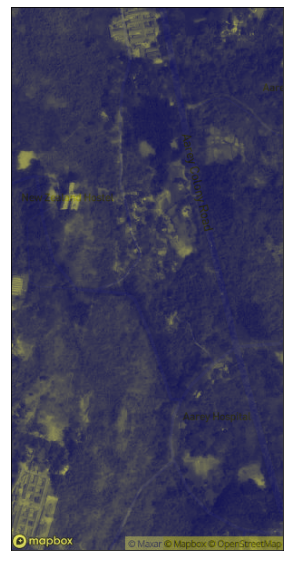

In [215]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(8, 10), 
                  # title='RGB Composite Image'
                  )

plt.show()

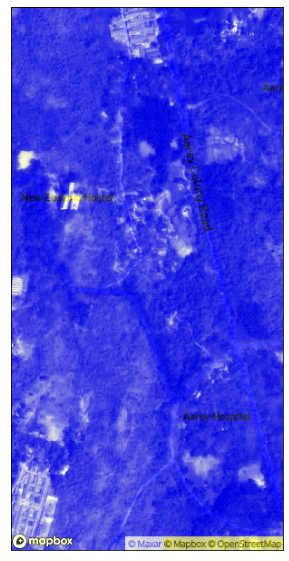

In [216]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(8, 10),
    # title="RGB Composite Image with Stretch Applied",
)


plt.show()

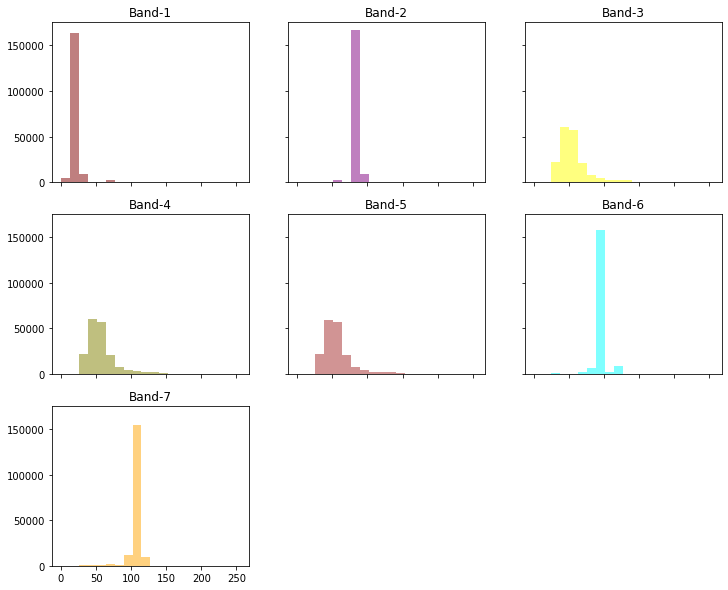

In [217]:
colors = ['maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan', 'orange']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 8)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

In [218]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(600, 300, 7)

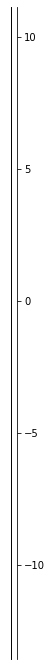

In [268]:
from sklearn.preprocessing import StandardScaler

X_data = x.reshape(-1, 7)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape



In [220]:
import cv2


In [270]:

y_data = cv2.imread('/home/karan/Remote-vegetation-sensing/project/data/satellite.tiff',0)
type(y_data)


numpy.ndarray

In [271]:
y_data.shape


(600, 300)

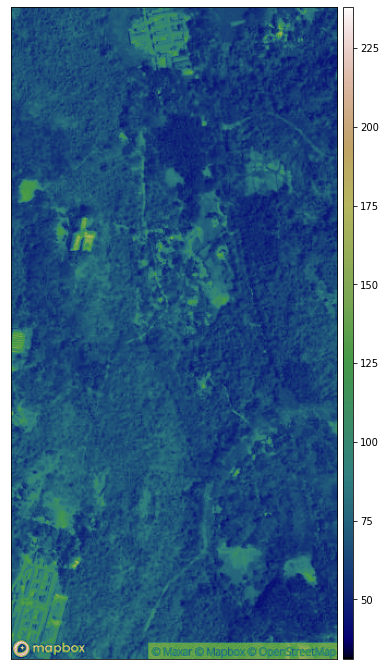

In [272]:
# Visualize Groundtruth

#ep.plot_bands(y_data, cmap=ListedColormap(['darkgreen', 'green', '#9E9E2F', '#202055', 'navy', 'forestgreen']))
ep.plot_bands(y_data, cmap='gist_earth')
plt.show()


In [263]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data.ravel(), test_size=0.3, random_state=60)



print(f'X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}')

X_train Shape: (126000, 7)
X_test Shape: (54000, 7)
y_train Shape: (126000,)
y_test Shape:(54000,)


In [264]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

In [265]:
print(f"Accuracy: {accuracy_score(y_test, knn_pred)*100}")

Accuracy: 97.85000000000001


In [266]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

          34       0.79      0.94      0.86        16
          35       0.36      0.44      0.40         9
          37       0.59      0.77      0.67        13
          39       0.50      0.18      0.27        11
          40       0.78      0.68      0.72        31
          42       0.48      0.46      0.47        28
          43       0.78      0.78      0.78       219
          45       0.85      0.86      0.86       514
          47       0.78      0.74      0.76       264
          48       0.80      0.76      0.78       222
          49       0.89      0.88      0.89       510
          51       1.00      1.00      1.00     47158
          52       0.97      0.91      0.94       559
          53       0.68      0.74      0.71       108
          55       0.73      0.68      0.70       130
          57       0.63      0.70      0.66        92
          59       0.89      0.74      0.81       157
          61       0.85    

/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/karan/.local/lib/python3.8/site-packages/skle

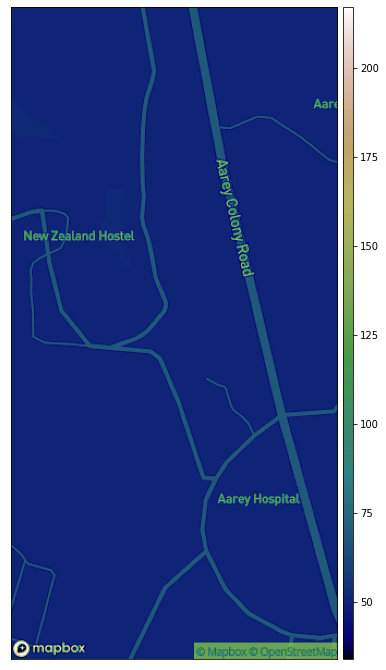

In [267]:
# Visualize Classification Map of K-NNC

ep.plot_bands(knn.predict(X_scaled).reshape((600, 300)), 
              cmap='gist_earth')
plt.show()